### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


In [44]:
# Write Your Code Below
# Import all libraries in this cell
import requests

import numpy as np

import urllib.request

import pandas as pd

import csv

from bs4 import BeautifulSoup

import seaborn as sns

sns.set_style("darkgrid")

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')  

import warnings

warnings.filterwarnings('ignore')

import lxml
import datetime as dt

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [45]:
NCDC_info = requests.get("http://covid19.ncdc.gov.ng/report/").text

Soup = BeautifulSoup(NCDC_info, 'lxml')


NCDC_info_table = Soup.find('div', class_ = "table-responsive")
Column_unform = NCDC_info_table.find_all('th', class_ ="")

Table_data = NCDC_info_table.find_all('td', class_ ="")

colz = []
tableData = []


for columnsItems in Column_unform:
    colz.append(columnsItems.text)
#print(colz)

for cellData in Table_data:
    tableData.append(cellData.text.strip().replace('\n', ""))

rows = int(len(tableData)/5)

tableData = np.array(tableData).reshape(rows, 5)

DFA_NCDC = pd.DataFrame(tableData, columns = colz)


# SECTION B begins here:
### ---------------------------------------------------------------------------------------------------------

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [46]:
#[Write Your Code Here]
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dead_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

con_DF_JH = pd.read_csv(confirmed_url)
Rec_DF_JH = pd.read_csv(recovered_url)
Dea_DF_JH = pd.read_csv(dead_url)

In [47]:
Rec_DF_JH.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ------------------------------------------------------------------

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [48]:
#[Write Your Code Here]
covid_extDF = pd.read_csv('covid_external.csv')
budget_df = pd.read_csv('Budget data.csv')
GDP_df = pd.read_csv('realGDP.csv')


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [49]:
#[Write Your Code Here]
DFA_NCDC.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"102,332",979,"100,582",771
1,FCT,"28,949",167,"28,533",249
2,Rivers,"17,252",383,"16,715",154
3,Kaduna,"11,402",88,"11,225",89
4,Oyo,"10,311",49,"10,060",202



#### -------------------------------------------------SECTION 3-----------------------------------------------------------

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [50]:
#[Write Your Code Here]
DFA_NCDC

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"102,332",979,"100,582",771
1,FCT,"28,949",167,"28,533",249
2,Rivers,"17,252",383,"16,715",154
3,Kaduna,"11,402",88,"11,225",89
4,Oyo,"10,311",49,"10,060",202
5,Plateau,"10,279",21,"10,183",75
6,Edo,"7,821",102,"7,398",321
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,542",260,"5,170",112
9,Ondo,"5,173",315,"4,749",109


In [51]:
lab_confirmed = []

for item in DFA_NCDC['No. of Cases (Lab Confirmed)']:
    item = str(item).replace(",","")
    item = int(item)
    lab_confirmed.append(item)

DFA_NCDC['No. of Cases (Lab Confirmed)'] = lab_confirmed


In [52]:
on_admission = []

for item in DFA_NCDC['No. of Cases (on admission)']:
    item = str(item).replace(",","")
    item = int(item)
    on_admission.append(item)

DFA_NCDC['No. of Cases (on admission)'] = on_admission

In [53]:
discharged = []

for item in DFA_NCDC['No. Discharged']:
    item = str(item).replace(",","")
    item = int(item)
    discharged.append(item)

DFA_NCDC['No. Discharged'] = discharged

In [54]:
dead = []

for item in DFA_NCDC['No. of Deaths']:
    item = str(item).replace(",","")
    item = int(item)
    dead.append(item)

DFA_NCDC['No. of Deaths'] = dead

In [55]:
DFA_NCDC.dtypes


States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [56]:
indexofNig = con_DF_JH.index[con_DF_JH['Country/Region']=='Nigeria']

nigeriaConfirmedcases = con_DF_JH.iloc[indexofNig]
nigeriaConfirmedcases

del nigeriaConfirmedcases['Province/State']
del nigeriaConfirmedcases['Country/Region']
del nigeriaConfirmedcases['Lat']
del nigeriaConfirmedcases['Long']

nigeriaConfirmedcases = nigeriaConfirmedcases.T

nigeriaConfirmedcases.reset_index(inplace = True)
nigeriaConfirmedcases = nigeriaConfirmedcases.set_axis(['Date', 'Cases'],axis = 1)


nigeriaConfirmedcases

TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [57]:

indexofNig1 = Rec_DF_JH.index[Rec_DF_JH['Country/Region']=='Nigeria']

nigeriarecoveredcases = Rec_DF_JH.iloc[indexofNig1]

del nigeriarecoveredcases['Province/State']
del nigeriarecoveredcases['Country/Region']
del nigeriarecoveredcases['Lat']
del nigeriarecoveredcases['Long']

nigeriarecoveredcases = nigeriarecoveredcases.T

nigeriarecoveredcases.reset_index(inplace = True)
nigeriarecoveredcases = nigeriarecoveredcases.set_axis(['Date', 'Cases'],axis = 1)


nigeriarecoveredcases

TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [58]:
indexofNig2 = Dea_DF_JH.index[Dea_DF_JH['Country/Region']=='Nigeria']

nigeriadeathcases = Dea_DF_JH.iloc[indexofNig2]

del nigeriadeathcases['Province/State']
del nigeriadeathcases['Country/Region']
del nigeriadeathcases['Lat']
del nigeriadeathcases['Long']

nigeriadeathcases = nigeriadeathcases.T

nigeriadeathcases.reset_index(inplace = True)
nigeriadeathcases = nigeriadeathcases.set_axis(['Date', 'Cases'],axis = 1)


nigeriadeathcases

### -------------------------------------------------------Section 4-------------------------------------------------------

### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [59]:
TopTENLAB = DFA_NCDC.sort_values(by = 'No. of Cases (Lab Confirmed)', ascending = False).head(10)



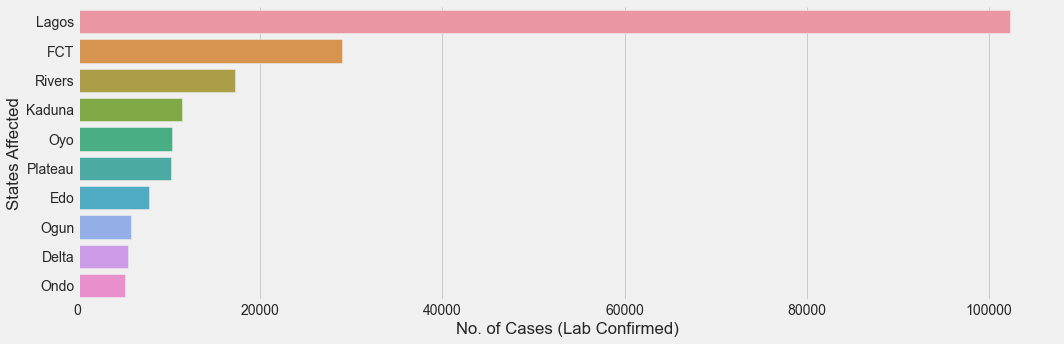

In [60]:
data = TopTENLAB[['States Affected', 'No. of Cases (Lab Confirmed)']]

sns.catplot(data = data, x = 'No. of Cases (Lab Confirmed)', y = 'States Affected', kind = 'bar', aspect = 3)

###### Ans- The top ten states with the highest covid19 cases are Lagos followed by Abuja, Rivers, Kaduna, Oyo, Plateau, Edo, Ogun, Delta, and Ondo

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

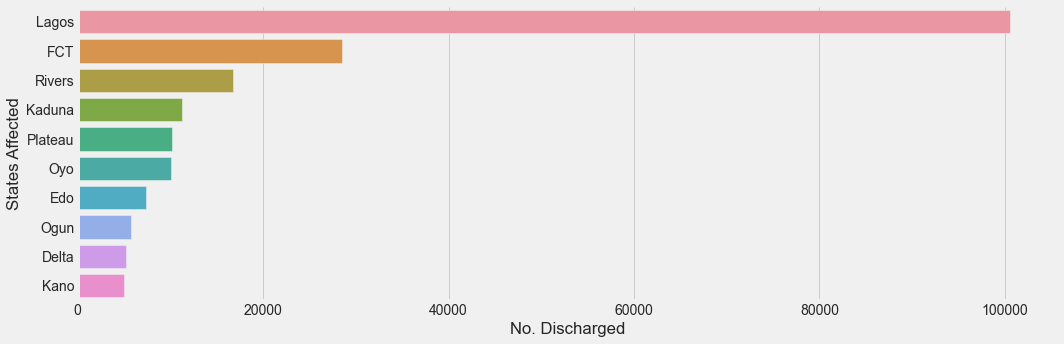

In [61]:
TopTENDischarged = DFA_NCDC.sort_values(by = 'No. Discharged', ascending = False).head(10)

data2 = TopTENDischarged[['States Affected', 'No. Discharged']]
sns.catplot(data = data2, x = 'No. Discharged', y = 'States Affected', kind = 'bar', aspect = 3)

###### The top 10 states in terms of discharge rate are: Lagos, FCT, Rivers, Kaduna, Plateau, Oyo, Edo, Ogun, Delta and Kano.

TODO D - Plot the top 10 Death cases

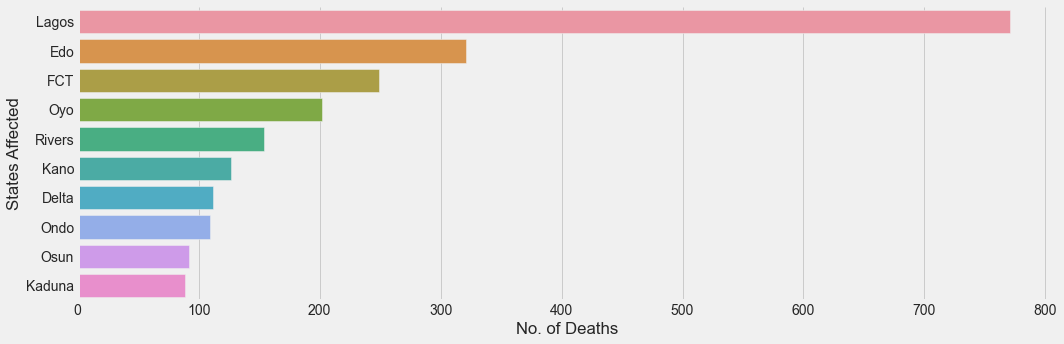

In [62]:
TopTENDdeath = DFA_NCDC.sort_values(by = 'No. of Deaths', ascending = False).head(10)

data3 = TopTENDdeath[['States Affected', 'No. of Deaths']]
sns.catplot(data = data3, x = 'No. of Deaths', y = 'States Affected', kind = 'bar', aspect = 3)

###### The top 10 states with the highest death rates are: Lagos, Edo, FCT, Oyo, Rivers, Kano, Delta, Ondo, Osun, and Kaduna. 

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [63]:
con_rec_death = pd.concat([nigeriaConfirmedcases, nigeriarecoveredcases['Cases'], nigeriadeathcases['Cases']], axis = 1, join = 'outer')

In [64]:
con_rec_death.set_axis(['Date', 'Confirmed', 'Recovered', 'Deaths'], axis = 1, inplace = True)

In [65]:
con_rec_death["Date"] = pd.to_datetime(con_rec_death["Date"])

<AxesSubplot:>

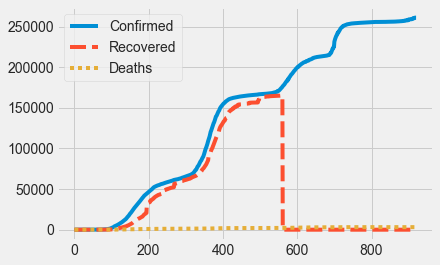

In [66]:
line_plotdata = con_rec_death[['Confirmed', 'Recovered', 'Deaths']]

sns.lineplot(data = line_plotdata)

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [67]:
derivative = con_rec_death[['Date','Confirmed']]
derivative['Confirmed'] = derivative['Confirmed'].diff()

In [68]:
derivative.fillna(value = 0, inplace = True)

In [69]:
derivative

,Date,Confirmed
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
916,2022-07-26,425.0
917,2022-07-27,0.0
918,2022-07-28,213.0
919,2022-07-29,0.0


<AxesSubplot:xlabel='Date'>

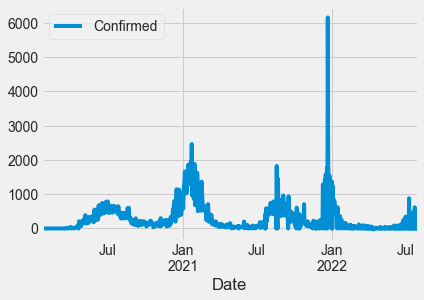

In [70]:
derivative.plot.line(x = 'Date', y = 'Confirmed')

In [71]:
#derivative.to_excel('changesincovidcases.xlsx')

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

- It is important to note here that the data in con_rec_death above are cummulative. That is to say that it would not give the daily rate of infections except one finds/calculates the derivetive which has been done above. The shape of the line_plotdata indicates this. It looks like an ogive. See below for the highest daily infection.

In [72]:
highest_confirmed = derivative['Confirmed'].max()

print(highest_confirmed)



6158.0


In [73]:
indexof_max = derivative['Confirmed'].index[derivative['Confirmed'] == 6158.0]

print(derivative['Date'].iloc[indexof_max])

700   2021-12-22
Name: Date, dtype: datetime64[ns]


- -ANS.: 2021-12-22 is the Date with the Highest rate of new COVID19 cases. That is, 22nd of December 2021. 

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [74]:
DFA_NCDC.rename(columns = {'States Affected':'states'}, inplace = True)


In [75]:

Ext_NCDC = pd.merge(DFA_NCDC, covid_extDF, on = ['states', 'states'], how = 'outer')

In [76]:
Ext_NCDC = Ext_NCDC.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [77]:
topTENexternal_NCDC = Ext_NCDC[['states', 'No. of Cases (Lab Confirmed)', 'Overall CCVI Index']]

<Figure size 432x288 with 0 Axes>

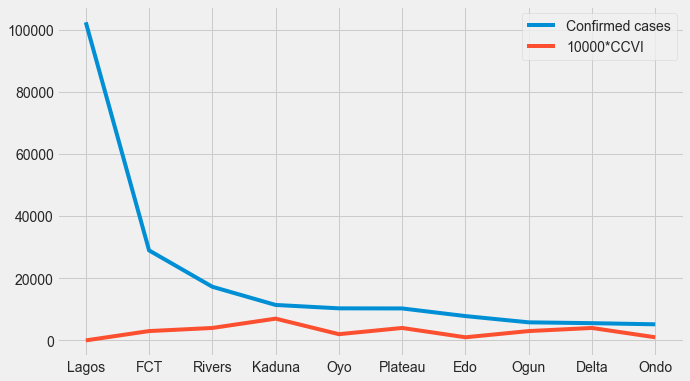

In [ ]:
plt.figure()
plt.figure(figsize= (10,6))
plt.plot(topTENexternal_NCDC['states'], topTENexternal_NCDC['No. of Cases (Lab Confirmed)'], topTENexternal_NCDC['states'], 10000* topTENexternal_NCDC['Overall CCVI Index'])
plt.legend(['Confirmed cases', '10000*CCVI'])


#plt.savefig('images/two-scales-4.png')

<AxesSubplot:>

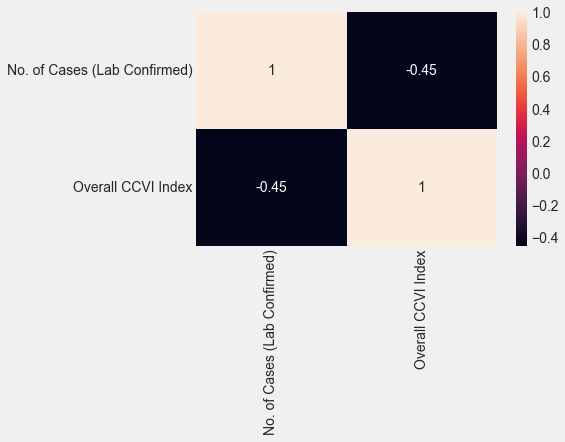

In [121]:
sns.heatmap(topTENexternal_NCDC[['No. of Cases (Lab Confirmed)', 'Overall CCVI Index']].corr(),annot = True)

- Note that the heatmap shows an overall negative relationship between the variables. This is bacause the dataset contains extreme values like the number of covid 19 cases in Lagos. For Lagos, there is an inverse relationship between the CCVI and the number of Covid cases. Kaduna, however seems to have a somewhat positive relationship between the CCVI and the number of cases confirmed.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)', ylabel='Population'>

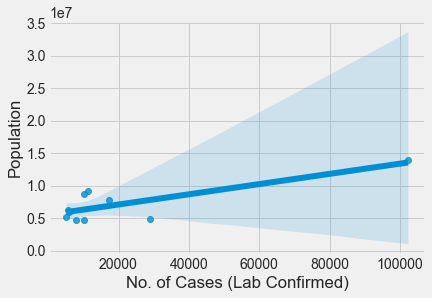

In [123]:
regression_plot = Ext_NCDC[['No. of Cases (Lab Confirmed)', 'Population']]
sns.regplot(x= 'No. of Cases (Lab Confirmed)', y = 'Population',data = regression_plot, fit_reg=True)



- ans.: The above chart shows that there is a direct relationship between the Number of cases confirmed and the population. This is to say that as the population rises(along the y axis) the number of cases also increases (along the x axis). 

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [125]:
Ext_NCDC['Death Per Case'] = Ext_NCDC[['No. of Deaths']].apply(lambda x:x/Ext_NCDC['No. of Cases (Lab Confirmed)'])

<AxesSubplot:xlabel='Death Per Case', ylabel='Health System'>

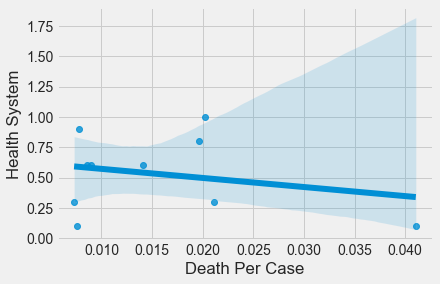

In [127]:
Ext_NCDC.head()
regress_plot2 = Ext_NCDC[['Death Per Case', 'Health System']]
sns.regplot(x= 'Death Per Case', y = 'Health System',data = regress_plot2, fit_reg=True)


- From the sake of comparison, I included a new column which calculates the number of deaths per the cases confirmed. Then I compared this with the health system. The expectation here is that where a state scores high in its health system, the number of deaths per case confirmed should be low. And that's what the above chart depicts. where the health system is high, the death per case is small.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

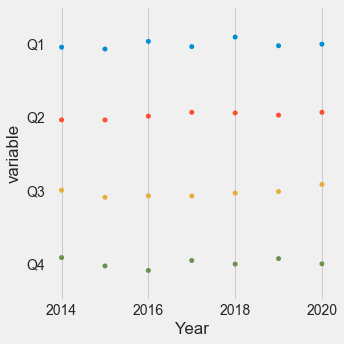

In [130]:
RealGDP_Bars = pd.melt(GDP_df, id_vars = 'Year')


In [134]:
RealGDP_Bars

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


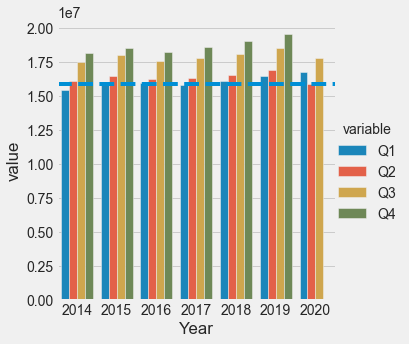

In [137]:
RealGDP_Bars
sns.catplot(x = 'Year', y = 'value', hue = 'variable', data = RealGDP_Bars, kind = 'bar', )

plt.axhline(y = 15890000.00, linestyle = '--')

- The above chart shows that the COVID19 pandemic had a negative effect on the country's real GDP, as it took it to the lowest it had ever been in the years under review.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data